In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks = False , grid =False)


In [2]:
data = pd.read_csv('twitter.csv')

In [3]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
data.drop("id", inplace= True,axis = 1)

In [5]:
data.head(5)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [7]:
data.describe()

,label
count,31962.000000
mean,0.070146
std,0.255397
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<AxesSubplot:>

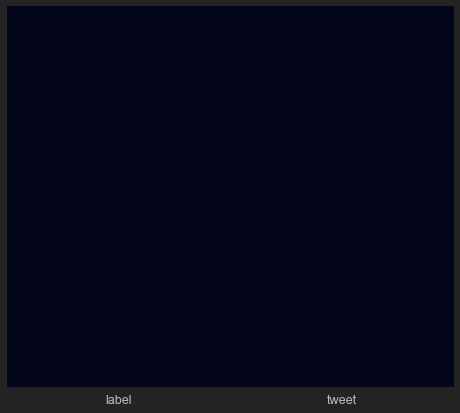

In [8]:
sns.heatmap(data.isnull(), yticklabels=False , cbar=False)

<AxesSubplot:title={'center':'Distribution of tweets'}, ylabel='Frequency'>

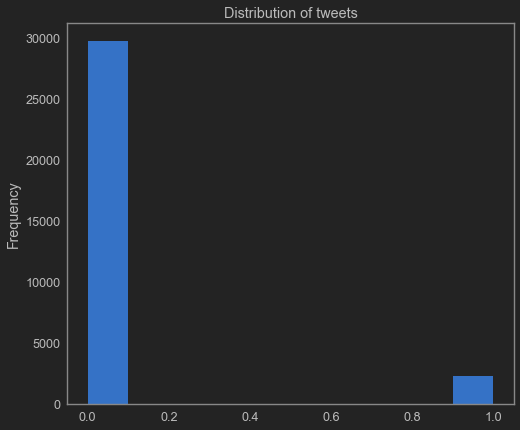

In [9]:
data['label'].plot(kind='hist', title = 'Distribution of tweets')

In [10]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

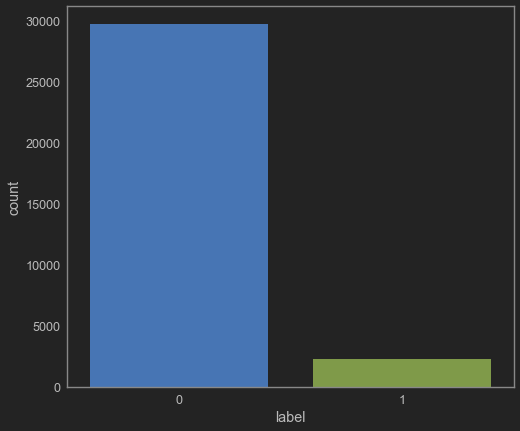

In [11]:
sns.countplot(data['label'], label="Count")

In [12]:
data['tweet_length'] = data['tweet'].apply(len)
data

,label,tweet,tweet_length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

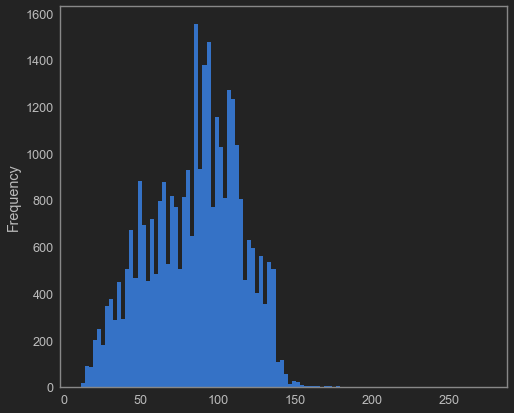

In [13]:
data['tweet_length'].plot(kind='hist' , bins = 100 , )

In [14]:
data.iloc[0][1]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [15]:
positive = data[data['label']==1]
negative = data[data['label']==0]

In [16]:
positive

,label,tweet,tweet_length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [17]:
negative

,label,tweet,tweet_length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


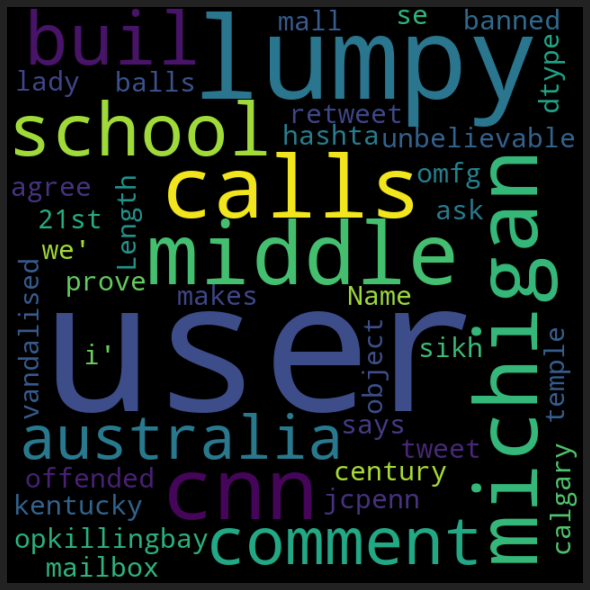

In [18]:
from wordcloud import WordCloud , STOPWORDS
comments = positive['tweet']
wordcloud = WordCloud(
    width=640,
    height=640,
    background_color="black",
    stopwords=STOPWORDS   
).generate(str(comments))
fig = plt.figure(
figsize=(12,8),
    facecolor= 'k',
    edgecolor= 'k'
)
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

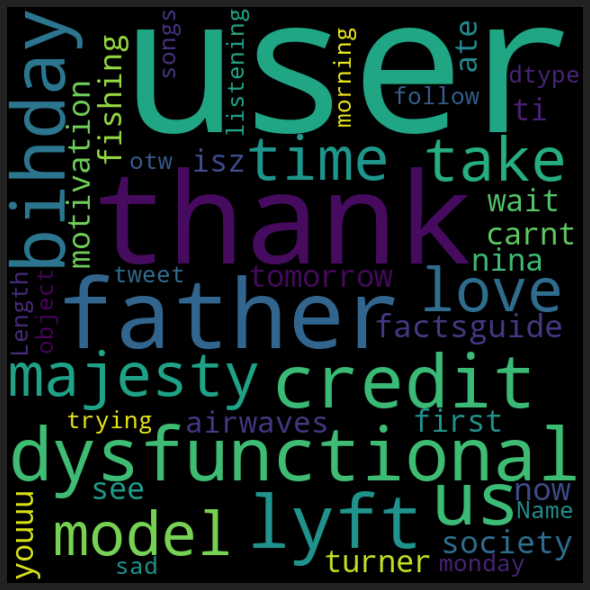

In [19]:
from wordcloud import WordCloud , STOPWORDS
comments = negative['tweet']
wordcloud = WordCloud(
    width=640,
    height=640,
    background_color="black",
    stopwords=STOPWORDS   
).generate(str(comments))
fig = plt.figure(
figsize=(12,8),
    facecolor= 'k',
    edgecolor= 'k'
)
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
def clean_message(msg):
    challenge = [(char) for char in msg if char not in string.punctuation ]
    challenge =''.join(challenge)
    challenge_clean = [word for word in challenge.split() if word.lower() not in stopwords.words('english')]
    return  challenge_clean

In [22]:
# data['clean_tweets'] = data['tweet'].apply(clean_message)

In [23]:
# data

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

tweets_cv = CountVectorizer(analyzer=clean_message , dtype='uint8').fit_transform(data['tweet']).toarray()

In [25]:
tweets_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
tweets_cv.shape

(31962, 47386)

In [27]:
x = tweets_cv
y = data['label']


In [28]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.25)


In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
from sklearn.metrics import classification_report , confusion_matrix


In [31]:
pred = clf.predict(x_test)


<AxesSubplot:>

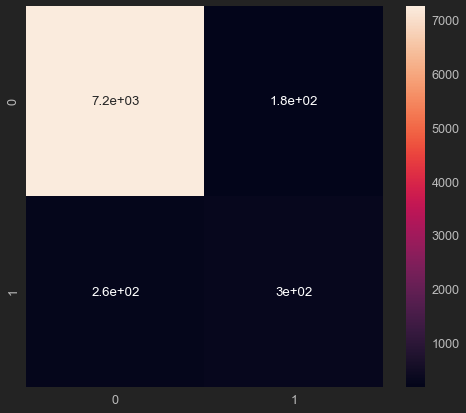

In [32]:
cm  = confusion_matrix(y_test , pred)
sns.heatmap(cm , annot=True)

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7429
           1       0.62      0.53      0.57       562

    accuracy                           0.94      7991
   macro avg       0.79      0.75      0.77      7991
weighted avg       0.94      0.94      0.94      7991

